In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np

### Reading the data

In [2]:
df = pd.read_excel('/home/mavi/Documentos/ast-obs/code/measurements.xlsx')
print(df)

                                                 Label  slice  Saturated  \
0    ct5gxz_2023-07-07T00-19-52.582_Science_Occulta...    803          0   
1    ct5gxz_2023-07-07T00-19-52.782_Science_Occulta...    804          0   
2    ct5gxz_2023-07-07T00-19-52.982_Science_Occulta...    805          0   
3    ct5gxz_2023-07-07T00-19-53.182_Science_Occulta...    806          0   
4    ct5gxz_2023-07-07T00-19-53.382_Science_Occulta...    807          0   
..                                                 ...    ...        ...   
383  ct5gxz_2023-07-07T00-21-10.017_Science_Occulta...   1186          0   
384  ct5gxz_2023-07-07T00-21-10.217_Science_Occulta...   1187          0   
385  ct5gxz_2023-07-07T00-21-10.417_Science_Occulta...   1188          0   
386  ct5gxz_2023-07-07T00-21-10.617_Science_Occulta...   1189          0   
387  ct5gxz_2023-07-07T00-21-10.817_Science_Occulta...   1190          0   

     J.D.-2400000        JD_UTC  JD_SOBS  HJD_UTC  BJD_TDB  AIRMASS  ALT_OBJ  \
0    60

In [6]:
julian_time = df['J.D.-2400000']
source_sky1 = df['Source-Sky_T1']
source_sky2 = df['Source-Sky_C2']
source_sky3 = df['Source-Sky_C3']

### Creating a function that calculates the time in seconds after midnight.

In [9]:
def julian_to_seconds(julian):
    fraction_day = julian % 1
    seconds = fraction_day * 86400
    return seconds


seconds_after_midnight = julian_time.apply(julian_to_seconds)

print(seconds_after_midnight)

0      44392.481050
1      44392.683053
2      44392.882032
3      44393.081962
4      44393.281977
           ...     
383    44469.918000
384    44470.116029
385    44470.316995
386    44470.516061
387    44470.718064
Name: J.D.-2400000, Length: 388, dtype: float64


### Calculating the ratio between the flux of the target star and the flux of the calibrator stars and normalizing the ratio so that it is centered at 1.

In [20]:
mean_flux23 = (source_sky2 + source_sky3) / 2 # value that goes in the denominator of the ratio
ratio = source_sky1 / mean_flux23

# making cuts on the x and y axis to get the mean value of the flux ​​outside the occultation period
seconds_after_midnight_cut = seconds_after_midnight[seconds_after_midnight > 44405]
ratio_cut = ratio[seconds_after_midnight > 44405]

mean = np.mean(ratio_cut)

ratio = ratio / mean # doing the normalization

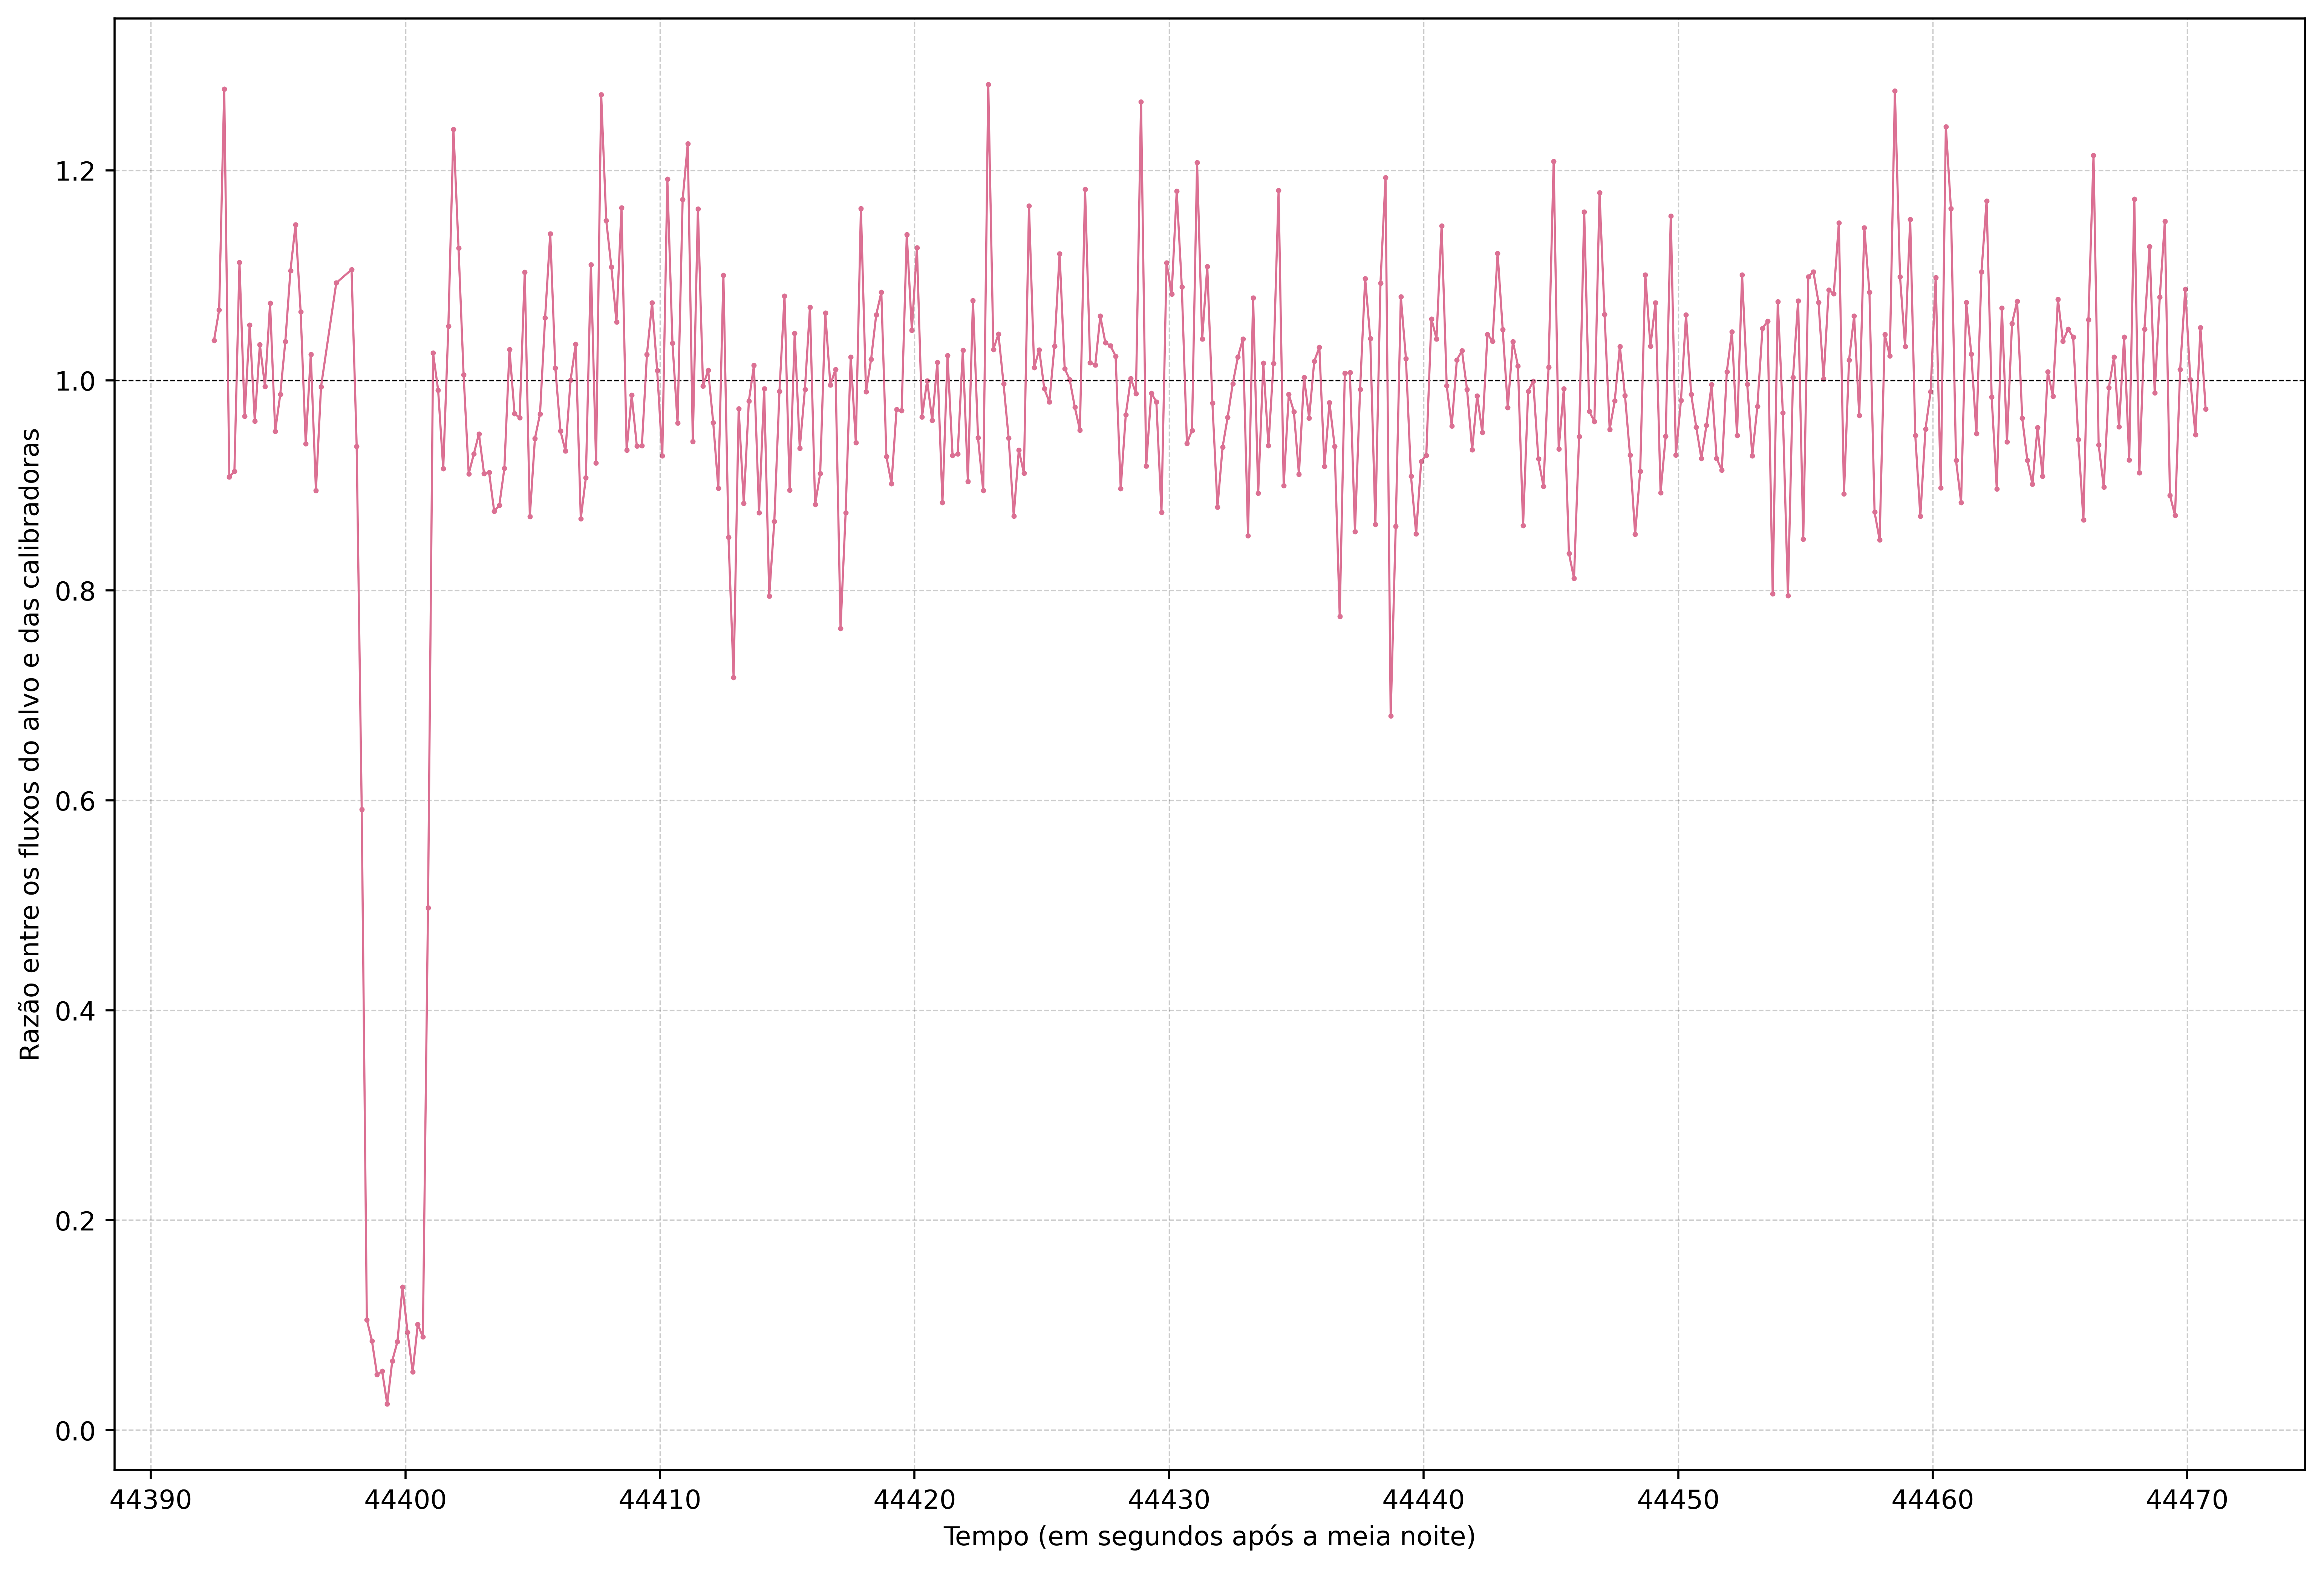

In [19]:
fig, ax = plt.subplots(figsize=(15,10), dpi=500)
plt.axhline(1, c='black', linewidth = 0.5, linestyle = '--')
plt.scatter(seconds_after_midnight, ratio, s=1, c='palevioletred')
plt.plot(seconds_after_midnight, ratio, linewidth=0.8, c='palevioletred')
plt.xlabel('Tempo (em segundos após a meia noite)')
plt.ylabel('Razão entre os fluxos do alvo e das calibradoras')

plt.grid(color = 'black', linestyle = '--', linewidth = 0.5, alpha=0.2)